### Student Information
**Name:** Victor D. Lopez

**Student ID:** 110062426

**GitHub ID:** vlopez0392

**Kaggle name:** vlopez0392

**Kaggle private scoreboard snapshot:**

[Snapshot](../pics/kaggle_leaderboard.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

# **PART I: Take home exercises**

In [1]:
###Imports
import pandas as pd

In [5]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [8]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [10]:
## Shuffle the dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## **Exercise 1**

Plot word frequency for Top 30 words in both train and test dataset.

**SOLUTION:**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [12]:
###Train dataset top 30 words
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)

In [13]:
train_counts.shape

(3613, 10115)

In [14]:
###Get the term frequencies and their indexes
term_freq = np.flip(np.sort(np.asarray(train_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(train_counts.sum(axis=0)[0])));

print(term_freq_idx[0][0:10],'\n');
print(term_freq[0][0:10],'\n')
print(pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:10]])

[ 8930  9119   537 10051  6371  4546  4571  4383  8924  5957] 

[1736 1289  955  796  793  787  717  626  537  535] 

8930      the
9119       to
537       and
10051     you
6371       of
4546       is
4571       it
4383       in
8924     that
5957       my
dtype: object


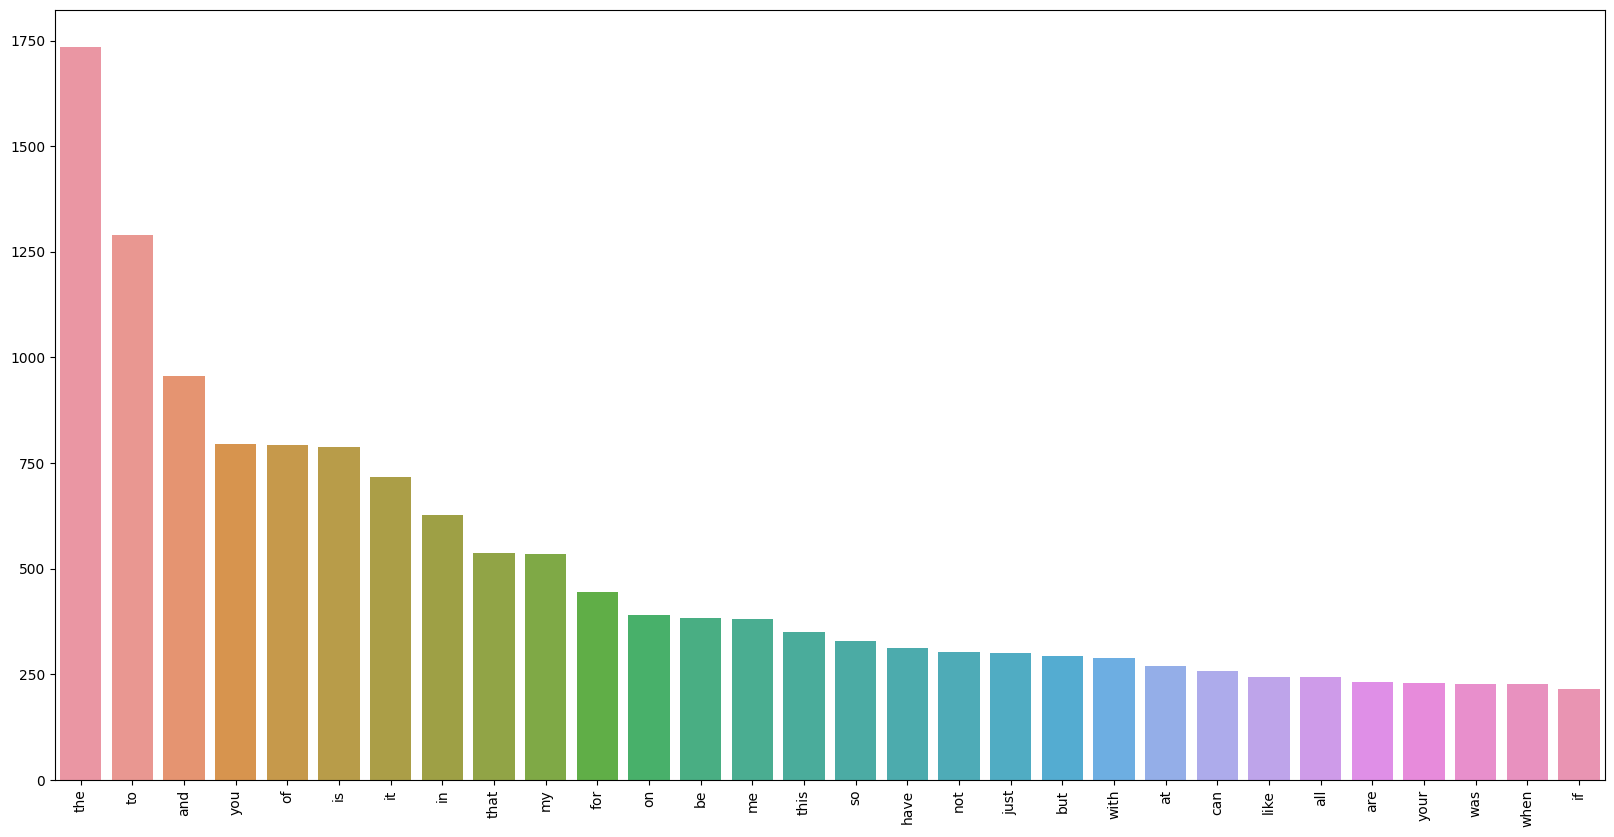

In [15]:
###Let's plot the top 30 words for the train dataset
import matplotlib.pyplot as plt
import seaborn as sns

k = 30; ##Parameter to control the number of terms we wish to visualize in our graph
x_count_train = pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq_train =  pd.Series(term_freq[0][:]).iloc[0:k];
x_count_train = x_count_train.array

##Plot
plt.subplots(figsize=(20, 10))
g = sns.barplot(x = x_count_train, y = y_freq_train)
g.set_xticklabels(x_count_train, rotation = 90);

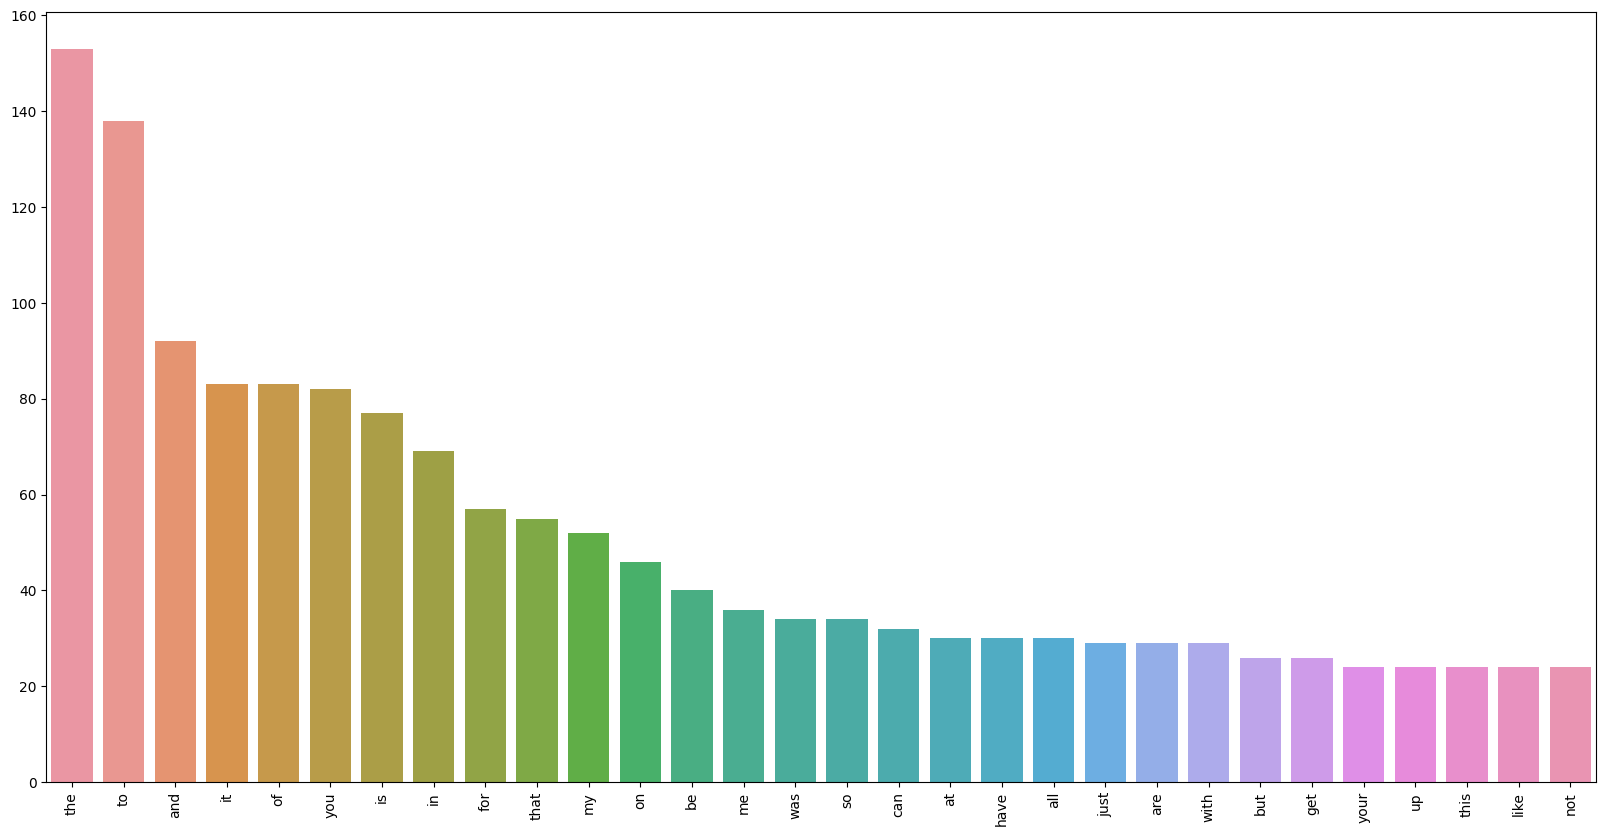

In [16]:
###Repeat the above with the test dataset
count_vect2 = CountVectorizer()
test_counts = count_vect2.fit_transform(test_df.text)

term_freq = np.flip(np.sort(np.asarray(test_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(test_counts.sum(axis=0)[0])));

k = 30; ##Parameter to control the number of terms we wish to visualize in our graph
x_count_test = pd.Series(count_vect2.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq_test =  pd.Series(term_freq[0][:]).iloc[0:k];
x_count_test = x_count_test.array

##Plot
plt.subplots(figsize=(20, 10))
g = sns.barplot(x = x_count_test, y = y_freq_test)
g.set_xticklabels(x_count_test, rotation = 90);

## **Exercise 2**

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

**SOLUTION:**

In [17]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

###Build analyzer
TFIDFvectorizer = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)

###Apply analyzer to training data
TFIDFvectorizer.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDFvectorizer.transform(train_df['text'])

###Display the feature names
feature_names_1000 = TFIDFvectorizer.get_feature_names_out()
feature_names_1000[100:110]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

## **Exercise 3**

Can you interpret the results above? What do they mean?

**SOLUTION:**

According to the classification report, the Decision Tree model has an accuracy of 66%, an average precision of 66%, an average recall of 66% and finally and average F1 score of 66%. Since, the precision and recall values are similar, on average our Decision tree model has classified an equal amount of emotions as false positives, as it has classified false negatives. This is probably because our classes are fairly balanced.

The confusion matrix is a reflection of this, for each emotion, we have approximately the same number of false positives and false negatives, except of course for the fear emotion which, according to the distribution obtained in the tutorial, has the most number of examples in the training set. Thus, we expect it to be classified correctly (and incorrectly) at a higher rate compared to other emotions.

Overall, the DT model has a fair performance. More powerful models such as Random Forests or Deep Learning based models should be able to outperform it.

The figure below show our classification report:

<img src="./img/classification_report_3.png" alt="classification_report_DT" width="400"/>

Finally, the confusion matrix is shown below:

<img src="./img/confusion_matrix_3.png" alt="confusion_matrix_DT" width="400"/>






## **Exercise 4**

Build a model using a Naive Bayes model and train it. What are the testing results?

In [18]:
#Imports
from sklearn.naive_bayes import MultinomialNB

X_train = TFIDFvectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDFvectorizer.transform(test_df['text'])
y_test = test_df['emotion']

##Build the NB classifier and train
NB_model =  MultinomialNB(force_alpha=True)
NB_model.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [19]:
##Let's analyze the results by getting the accuracy, classification report
##and by plotting the confusion matrix as we did in the lab 2 tutorial:
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## Accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.86
testing accuracy: 0.76


In [20]:
##Next let's print a classification report
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



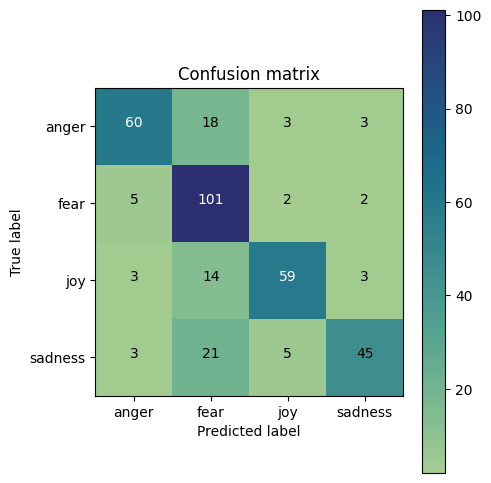

In [21]:
##Finally, print the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.color_palette("crest", as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()


my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## **Exercise 5**

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**SOLUTION:**

While decision trees are very flexible, easy to understand and debug, they tend to overfit the training data. We can see this in the lab 2 tutorial when the training accuracy obtained was 0.99 while the testing accuracy dropped by more than 30% at 0.66.

On the other hand, we can see that that the Multinomial Naive Bayes classifier surpassed the testing accuracy, precision, recall and F1-score of the DT model by 10% or more. While we can attribute this performace increase to the choice of model, we also notice we used the TF-IDF vectorizer to obtain the word embeddings along with a greater number of features (1000).

Naive Bayes also assumes that the features are independent from each other, an assumption that rarely holds in practice. However, for text identification and classification (our problem), this assumption holds stronger because the presence of certain words are strongly linked to their respective categories. Thus, we can see how our NB model could outperform the DT model given this assumption.

## **Exercise 6**

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

**SOLUTION:**

In [63]:
###Let's train a Deep Learning model as in the tutorial
import keras
from sklearn.feature_extraction.text import CountVectorizer

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_500.fit(train_df['text'])

# Transform documents to document-term matrix.
train_data_BOW_features = BOW_500.transform(train_df['text'])
test_data_BOW_features = BOW_500.transform(test_df['text'])

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [64]:
### One-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3094    sadness
2514        joy
1966       fear
816       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [65]:
##Build and train the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)    

In [66]:
## Train the model
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 3s 13ms/step - loss: 1.3286 - accuracy: 0.3681 - val_loss: 1.2805 - val_accuracy: 0.4524
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9747 - accuracy: 0.6551 - val_loss: 0.9535 - val_accuracy: 0.6167
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7999 - val_loss: 0.8099 - val_accuracy: 0.6830
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8558 - val_loss: 0.8283 - val_accuracy: 0.6715
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8912 - val_loss: 0.8727 - val_accuracy: 0.6686
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9131 - val_loss: 0.9174 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9319 - val_loss: 1.0222 - val_accuracy: 0.6657
Epoch

In [67]:
##Make some predictions
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 1s 8ms/step


array([[9.99989212e-01, 5.02201338e-08, 5.74679291e-07, 1.00805555e-05],
       [2.39926334e-02, 2.53335969e-03, 9.01486201e-05, 9.73383725e-01],
       [6.51309356e-13, 3.69600444e-12, 9.99999940e-01, 4.32971123e-13],
       [1.69943664e-02, 3.22026921e-07, 3.00981178e-08, 9.83005285e-01],
       [9.26337525e-05, 1.65739806e-07, 1.99380293e-06, 9.99905169e-01]],
      dtype=float32)

In [68]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'joy', 'sadness', 'sadness'], dtype=object)

In [69]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [70]:
##Display the training log
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368115,1.328629,0.452450,1.280512
1,1,0.655134,0.974704,0.616715,0.953485
2,2,0.799889,0.565373,0.682997,0.809940
3,3,0.855798,0.402225,0.671470,0.828348
4,4,0.891226,0.313504,0.668588,0.872731
5,5,0.913092,0.254067,0.674352,0.917371
6,6,0.931913,0.208238,0.665706,1.022206
7,7,0.943537,0.181523,0.659942,1.047395
8,8,0.955992,0.152094,0.671470,1.119723
9,9,0.961528,0.135830,0.682997,1.158908


In [71]:
###First, let's create a training_log dataframe

training_log = pd.read_csv("logs/training_log.csv", header=None, names=["epoch",	"accuracy",	"loss",	"val_accuracy",	"val_loss"])
training_log.drop([0], inplace = True);

In [72]:
training_log.head()

,epoch,accuracy,loss,val_accuracy,val_loss
1,0,0.3681151270866394,1.3286293745040894,0.4524495601654053,1.2805120944976807
2,1,0.6551342606544495,0.9747042655944824,0.6167147159576416,0.9534845948219299
3,2,0.7998892664909363,0.5653734803199768,0.6829971075057983,0.8099400401115417
4,3,0.8557984828948975,0.40222540497779846,0.6714697480201721,0.8283477425575256
5,4,0.8912261128425598,0.3135036826133728,0.6685879230499268,0.8727313876152039


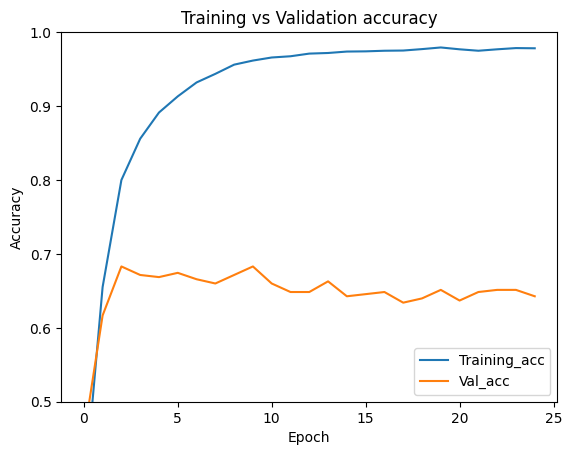

In [81]:
###Next, lets plot the curves using matplotlib
import matplotlib.pyplot as plt

def plotCurves(epoch, training_curve, validation_curve, title, acc = True):
  X  = epoch.astype(np.float64).values
  y1 = training_curve.astype(np.float64).values
  y2 = validation_curve.astype(np.float64).values

  plt.plot(X, y1)
  plt.plot(X, y2)
  plt.title(title)
  plt.xlabel("Epoch")

  if acc:
    plt.legend(["Training_acc", "Val_acc"])
    plt.ylim(0.5, 1.0)
    plt.ylabel("Accuracy")
  else:
    plt.legend(["Training_loss", "Val_loss"])
    plt.ylim(0, 2.0)
    plt.ylabel("Loss")

  plt.show()

##1. Plot the training accuracy vs validation accuracy
epoch = training_log["epoch"]
train_acc = training_log["accuracy"]
val_acc   = training_log["val_accuracy"]

plotCurves(epoch, train_acc, val_acc, title = "Training vs Validation accuracy")

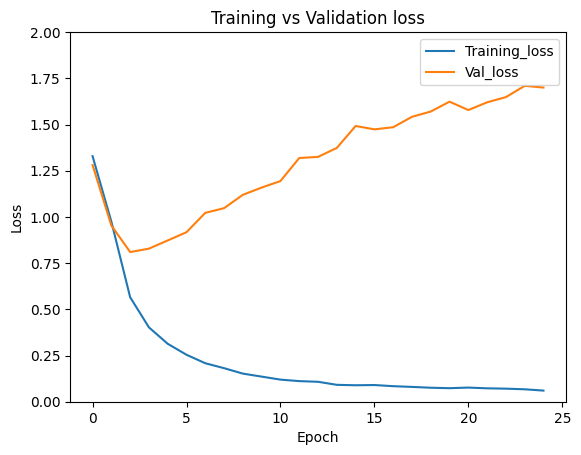

In [82]:
##2. Plot the training loss vs validation loss
epoch = training_log["epoch"]
train_acc = training_log["loss"]
val_acc   = training_log["val_loss"]

plotCurves(epoch, train_acc, val_acc, title = "Training vs Validation loss", acc = False)

**Discussion:**

Based on the Loss curve, our model seems to be overfitting to the training data. The large gap between training and validation loss is a clear indicator of overfitting, thus to alleviate this problem we could try some regularization techniques along with early stopping (reduce number of epochs). In addition, we could also add some more data, either by data augmentation or crawling for more data in Twitter to avoid overfitting.

## **Exercise 7**

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

**SOLUTION:**

There are many ways to represent the sentence data with the word vectors. One interesting way to do so, is using a paragraph vector approach or *Doc2Vec*. In *Doc2Vec* a paragraph vector is computed. To compute the paragraph vector, we train the model to predict the next word by using some of the previous words and the previous paragraph.

By doing so, we average or concatenate the presentations of individual words in the sequence. Training the model this way will force the paragraph vector to store the representation of the paragraphs. Here, a paragraph can be any sequence of various lengths. We can consider the paragraph vector as a type of memory that remembers the context of the word we want to predict. As a result, we can predict a more related word for that position.

The following figure, shows the basic architecture of *Doc2Vec*:

<img src="./img/doc2vec.png" alt="doc2vec" width="600"/>



## **Exercise 8**

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [11]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [12]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

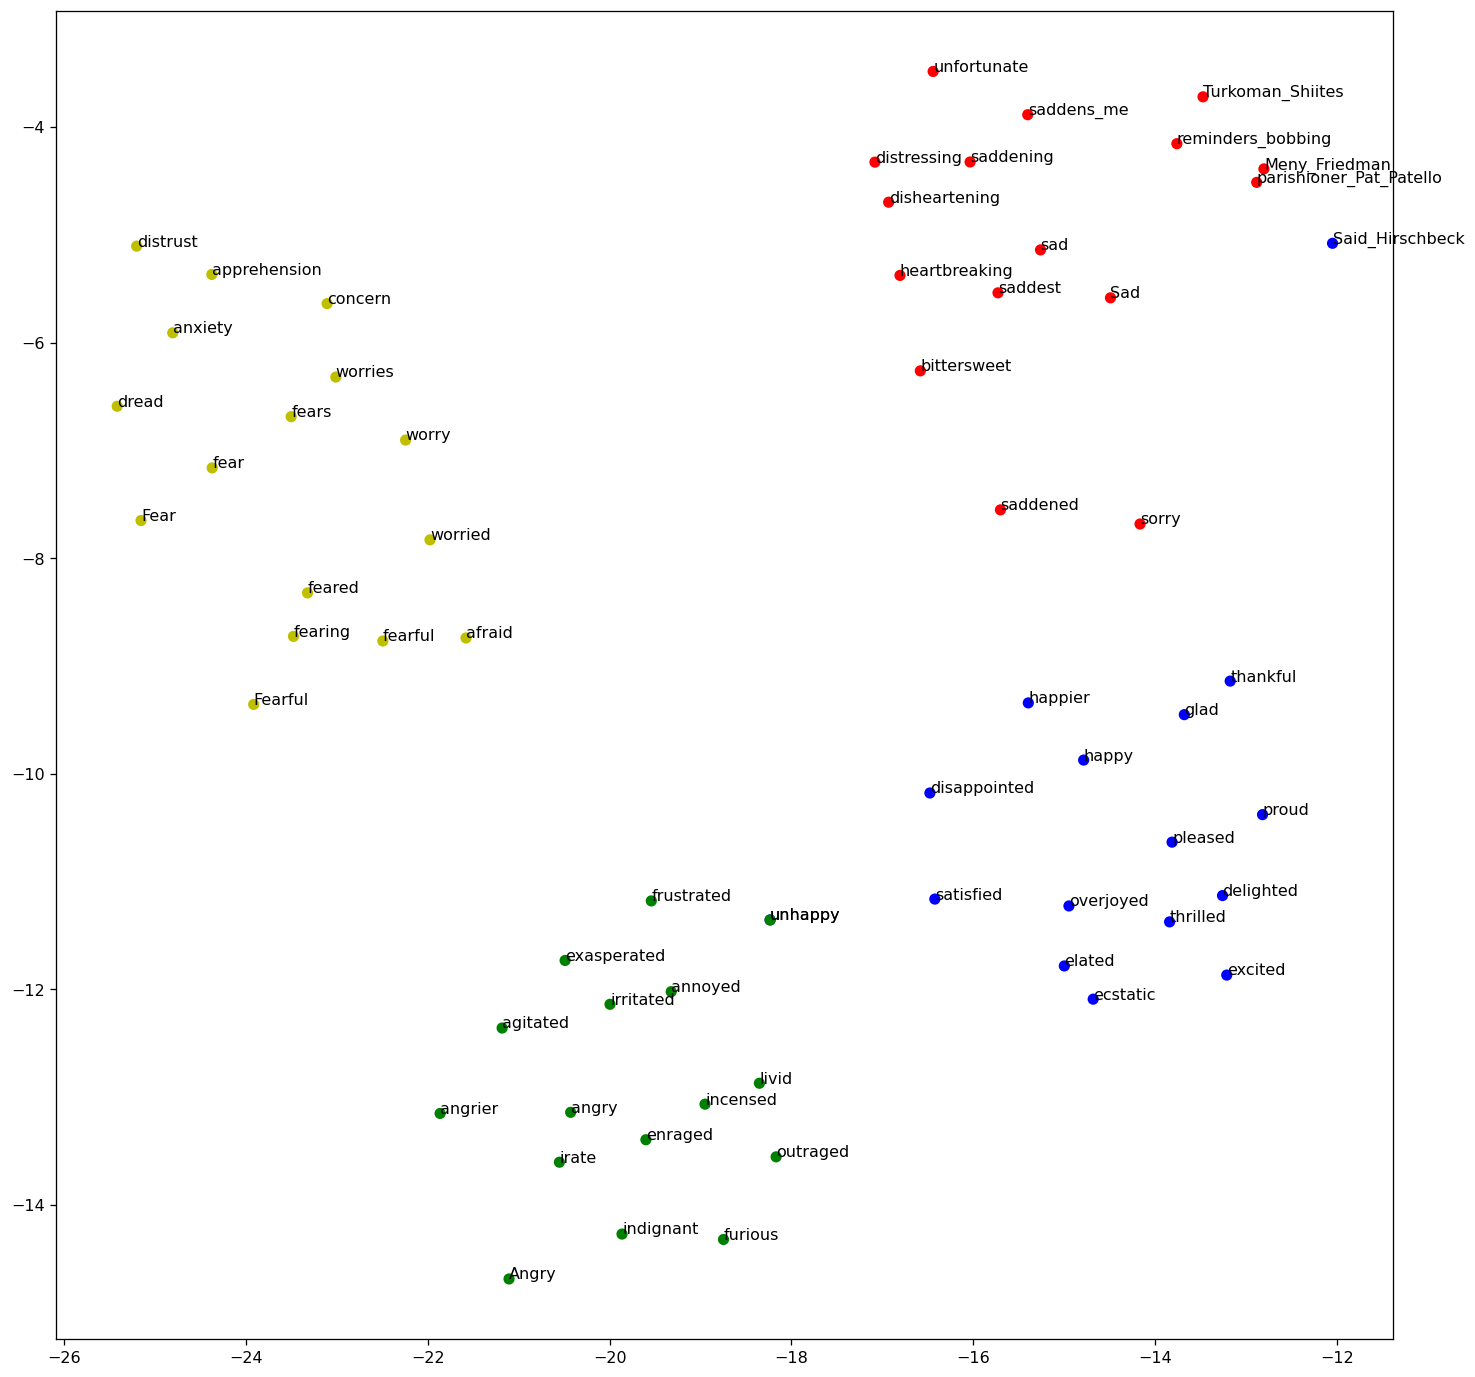

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# **PART II: Kaggle Competition Report**